In [1]:
#!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm
from sklearn.model_selection import GridSearchCV,train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [4]:
data_train=pd.read_csv('SalaryData_Train(1).csv')
data_test=pd.read_csv('SalaryData_Test(1).csv')

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [7]:
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
A=LabelEncoder()
data_train['workclass']=A.fit_transform(data_train['workclass'])
data_train['education']=A.fit_transform(data_train['education'])
data_train['maritalstatus']=A.fit_transform(data_train['maritalstatus'])
data_train['occupation']=A.fit_transform(data_train['occupation'])
data_train['relationship']=A.fit_transform(data_train['relationship'])
data_train['race']=A.fit_transform(data_train['race'])
data_train['sex']=A.fit_transform(data_train['sex'])
data_train['Salary']=A.fit_transform(data_train['Salary'])
data_train['native']=A.fit_transform(data_train['native'])


data_test['workclass']=A.fit_transform(data_test['workclass'])
data_test['education']=A.fit_transform(data_test['education'])
data_test['maritalstatus']=A.fit_transform(data_test['maritalstatus'])
data_test['occupation']=A.fit_transform(data_test['occupation'])
data_test['relationship']=A.fit_transform(data_test['relationship'])
data_test['race']=A.fit_transform(data_test['race'])
data_test['sex']=A.fit_transform(data_test['sex'])
data_test['Salary']=A.fit_transform(data_test['Salary'])
data_test['native']=A.fit_transform(data_test['native'])

In [9]:
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


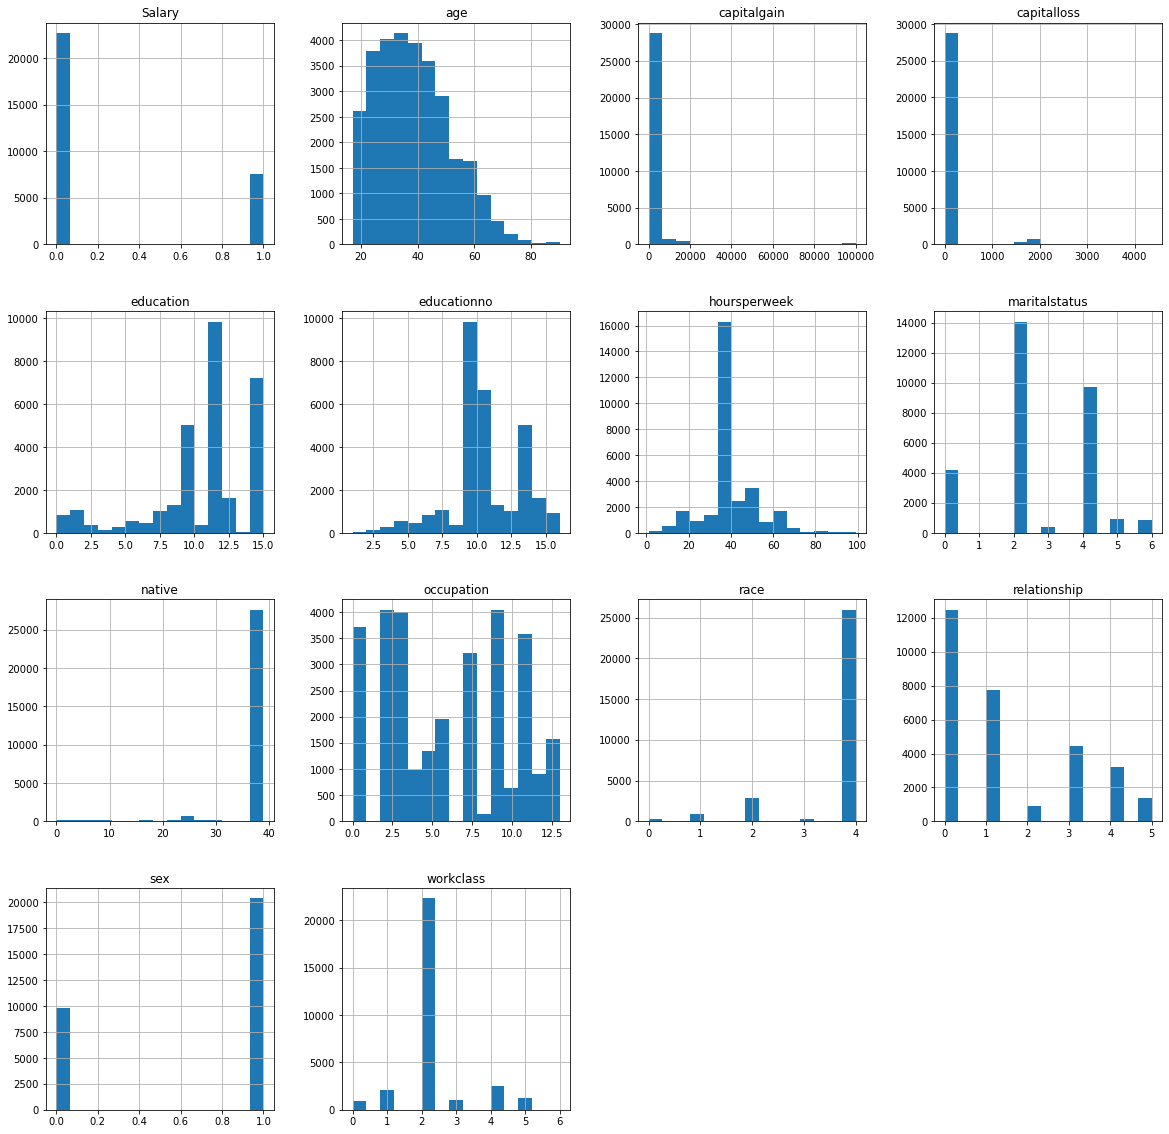

In [10]:
data_train.hist(bins=15,figsize=(20,20))
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

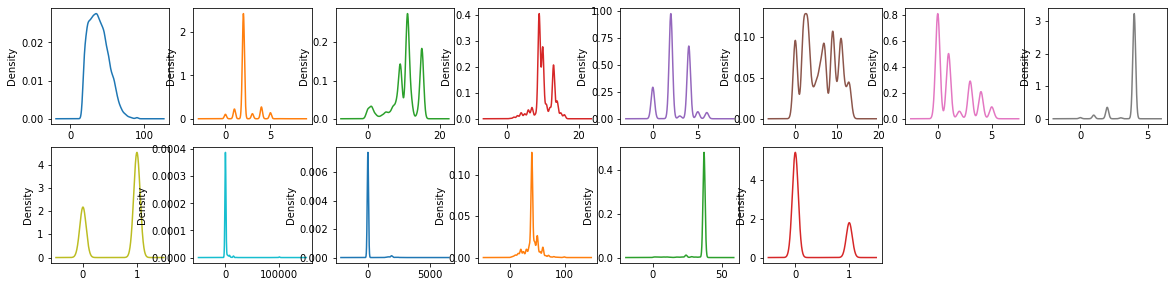

In [12]:
data_train.plot(kind='density',figsize=(20,20),subplots=True,layout=(8,8),sharex=False,legend=False)
plt.show

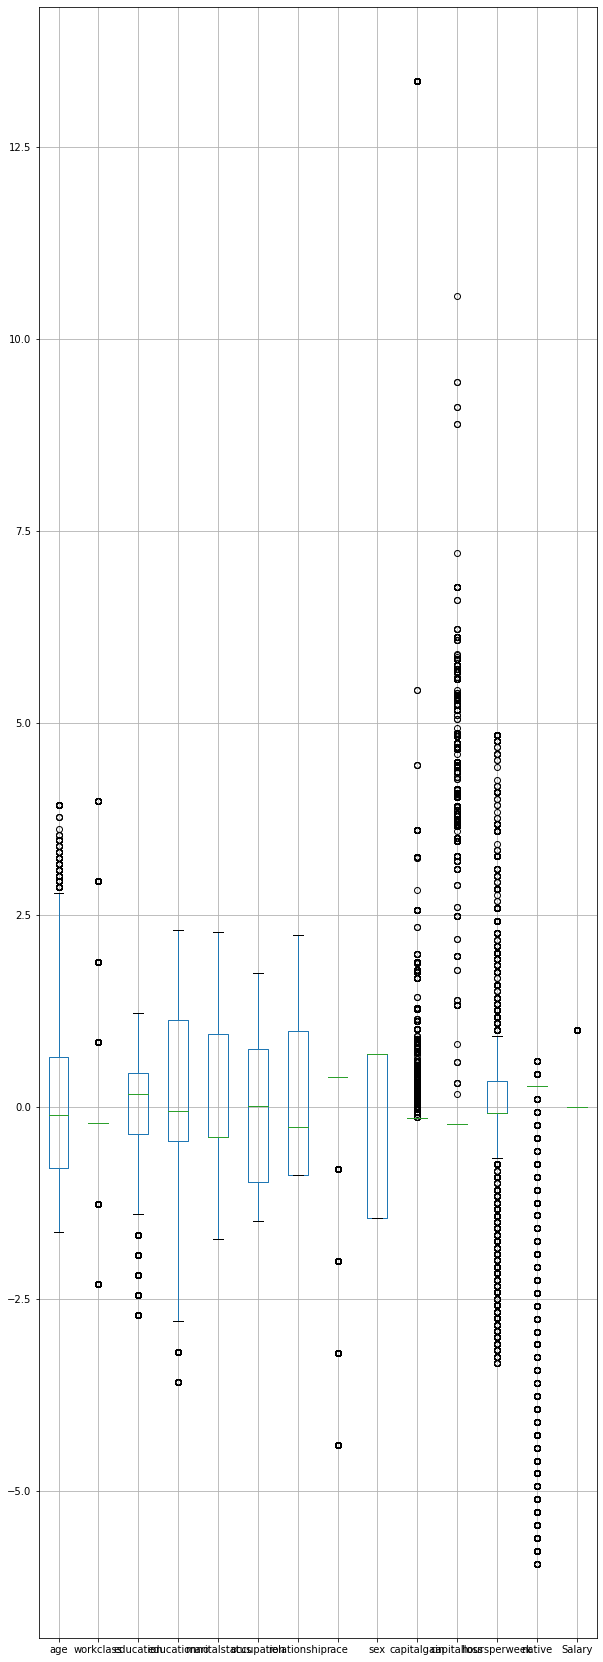

In [23]:
data_train.boxplot(figsize=(10,30))

In [14]:
B=StandardScaler()
data_train.iloc[:,0:13]=B.fit_transform(data_train.iloc[:,0:13])
data_test.iloc[:,0:13]=B.fit_transform(data_test.iloc[:,0:13])

In [15]:
X_train=np.array(data_train.iloc[:,0:13])
Y_train=np.array(data_train.iloc[:,13:]).ravel()
X_test=np.array(data_test.iloc[:,0:13])
Y_test=np.array(data_test.iloc[:,13:]).ravel()

In [16]:
parameters = [{'kernel':['linear'],'C':[10,0.1,15] }]
model=svm.SVC()
grid=GridSearchCV(model,parameters,cv=5)
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [10, 0.1, 15], 'kernel': ['linear']}])

In [17]:
grid.best_params_,grid.best_score_

({'C': 15, 'kernel': 'linear'}, 0.8104505293828241)

In [18]:
model=svm.SVC(kernel='linear',C=15)

In [19]:
model.fit(X_train,Y_train)

SVC(C=15, kernel='linear')

In [20]:
Y_pred=model.predict(X_test)

In [21]:
A=confusion_matrix(Y_pred,Y_test)
A

array([[11008,  2521],
       [  352,  1179]], dtype=int64)

In [22]:
(A[0,0]+A[1,1])/A.sum()

0.8092297476759628

# limited option are used in grid search to reduce computation time